# Data project - Insights from Failed Orders - Gett 

## Table of Contents

Assignment
Read and Explore the Datasets
Question 1
Question 2
Question 3
Question 4
BONUS Question 5

# Table of Contents
1. [Section 1](#section-1)
2. [Section 2](#section-2)
3. [Section 3](#section-3)

# Assignement

Insights from Failed Orders

Gett, previously known as GetTaxi, is an Israeli-developed technology platform solely focused on corporate Ground Transportation Management (GTM). They have an application where clients can order taxis, and drivers can accept their rides (offers). At the moment, when the client clicks the Order button in the application, the matching system searches for the most relevant drivers and offers them the order. In this task, we would like to investigate some matching metrics for orders that did not completed successfully, i.e., the customer didn't end up getting a car.

# Exploratory Data Analysis

We will start by loading the required libraries. We'll use Pandas to create and analyse the data set and we will use Scipy to calculate some statistics. For some mathematical operations, the Numpy library may come in handy, as it is the most popular library in Python for numerical computing.

In [ ]:
# import libraries, pandas and scipy are required, numpy will come in handy
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
# Point the path file of the dataset
offers = 'C:/Users/tangu/OneDrive/Documents/2- Perso/CODING/Projet_Portfolio/Insights_from_Failed_Orders.Gett/datasets/data_offers.csv'
orders = 'C:/Users/tangu/OneDrive/Documents/2- Perso/CODING/Projet_Portfolio/Insights_from_Failed_Orders.Gett/datasets/data_orders.csv'
# import and read the data
offers_df = pd.read_csv(offers)
orders_df = pd.read_csv(orders)

In [4]:
# Look up the first row
offers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 5.1 MB


In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [6]:
# Merge on the common column 'customer_id'
df = pd.merge(orders_df, offers_df, on='order_gk', how='inner')
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [7]:
df.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [8]:
 # Replace all the value of the column order_status_key (4:cancelled by client ; 9=rejected)
df['order_status_key'] = df['order_status_key'].replace({4: 'cancelled by client',9: 'rejected'})
# Replace all the value of the column is_driver_assigned_key (1=yes ; 0=no)
df['is_driver_assigned_key'] = df['is_driver_assigned_key'].replace({1: 'yes',0: 'no'})
# rename the columns for more clarity
df_q1 = df.rename(columns={'order_status_key':'status','is_driver_assigned_key':'driver_assigned'}, inplace=False)
df_q1

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,status,driver_assigned,cancellations_time_in_seconds,offer_id
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,cancelled by client,yes,198.0,300050983403
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986179
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986174
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986180
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,cancelled by client,yes,46.0,300050976275
...,...,...,...,...,...,...,...,...,...
31263,12:44:11,-0.975372,51.457846,NaN,3000597886155,cancelled by client,no,43.0,300051590196
31264,12:42:52,-0.975372,51.457846,NaN,3000597886140,cancelled by client,no,44.0,300051590176
31265,13:11:35,-0.975372,51.457846,NaN,3000599186906,cancelled by client,no,36.0,300051648809
31266,13:17:21,-0.972926,51.457693,60.0,3000599187034,cancelled by client,yes,34.0,300051648910


In [9]:
#df_q1.groupby(['driver_assigned','status'])['offer_id'].size().reset_index(name='count')

In [10]:
# Création d'une table pivot
df_q1_pivot = pd.pivot_table(
    df_q1,
    values='offer_id',    # Valeur à résumer
    columns=['driver_assigned','status'],    # Colonnes
    aggfunc='count'       # Fonction d'agrégation
)
df_q1_pivot

driver_assigned                  no                          yes         
status          cancelled by client rejected cancelled by client rejected
offer_id                      13435     9469                8360        4

<Axes: >

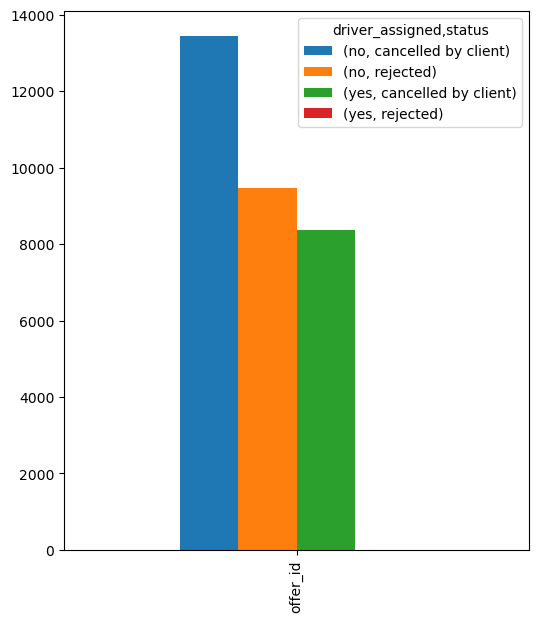

In [11]:
# Création du graphique
df_q1_pivot.plot(kind='bar',
                 figsize=(13,6), 
                 xticks=range(0,24),
                 grid='true', 
                 title='average time to cancellation with and without driver, by the hour',
                 xlabel='hour',
                 ylabel='time in seconds' )  # Type de graphique : barres

# question 2 
Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  int64  
 5   order_status_key               31268 non-null  object 
 6   is_driver_assigned_key         31268 non-null  object 
 7   cancellations_time_in_seconds  21795 non-null  float64
 8   offer_id                       31268 non-null  int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 2.1+ MB


In [10]:
df['order_datetime'] = pd.to_datetime(df['order_datetime'], format = '%H:%M:%S')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_datetime                 31268 non-null  datetime64[ns]
 1   origin_longitude               31268 non-null  float64       
 2   origin_latitude                31268 non-null  float64       
 3   m_order_eta                    8364 non-null   float64       
 4   order_gk                       31268 non-null  int64         
 5   order_status_key               31268 non-null  object        
 6   is_driver_assigned_key         31268 non-null  object        
 7   cancellations_time_in_seconds  21795 non-null  float64       
 8   offer_id                       31268 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 2.1+ MB


In [12]:
# Extraction des heures
df['hour'] = df['order_datetime'].dt.ceil('H').dt.hour

In [13]:
df

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,hour
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,cancelled by client,yes,198.0,300050983403,19
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986179,21
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986174,21
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986180,21
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,cancelled by client,yes,46.0,300050976275,13
...,...,...,...,...,...,...,...,...,...,...
31263,1900-01-01 12:44:11,-0.975372,51.457846,NaN,3000597886155,cancelled by client,no,43.0,300051590196,13
31264,1900-01-01 12:42:52,-0.975372,51.457846,NaN,3000597886140,cancelled by client,no,44.0,300051590176,13
31265,1900-01-01 13:11:35,-0.975372,51.457846,NaN,3000599186906,cancelled by client,no,36.0,300051648809,14
31266,1900-01-01 13:17:21,-0.972926,51.457693,60.0,3000599187034,cancelled by client,yes,34.0,300051648910,14


In [17]:
df.groupby(['hour','is_driver_assigned_key','order_status_key'])['offer_id'].size().reset_index(name='count')

,hour,is_driver_assigned_key,order_status_key,count
0,0,no,cancelled by client,1144
1,0,no,rejected,883
2,0,yes,cancelled by client,444
3,1,no,cancelled by client,957
4,1,no,rejected,706
...,...,...,...,...
68,22,no,rejected,1036
69,22,yes,cancelled by client,325
70,23,no,cancelled by client,954
71,23,no,rejected,660


In [18]:
df_pivot = pd.pivot_table(
    df,
    values='offer_id',    # Valeur à résumer
    index='hour',
    columns=['is_driver_assigned_key','order_status_key'],    # Colonnes
    aggfunc='count',       # Fonction d'agrégation
    fill_value=0
)
df_pivot

is_driver_assigned_key                  no                          yes  \
order_status_key       cancelled by client rejected cancelled by client   
hour                                                                      
0                                     1144      883                 444   
1                                      957      706                 326   
2                                      633      374                 298   
3                                      586      649                 240   
4                                      565      658                 195   
5                                       90       45                  92   
6                                       31       33                  47   
7                                      169      109                 114   
8                                      523      526                 517   
9                                     1447     1338                1080   
10                                     470      294                 494   
11                                     122       37                 228   
12                                     155       65                 290   
13                                     321       91                 285   
14                                     436      294                 342   
15                                     311      125                 297   
16                                     610      335                 499   
17                                     381      112                 339   
18                                     756      319                 465   
19                                     447      314                 375   
20                                     242       95                 307   
21                                     664      371                 346   
22                                    1421     1036                 325   
23                                     954      660                 415   

is_driver_assigned_key           
order_status_key       rejected  
hour                             
0                             0  
1                             4  
2                             0  
3                             0  
4                             0  
5                             0  
6                             0  
7                             0  
8                             0  
9                             0  
10                            0  
11                            0  
12                            0  
13                            0  
14                            0  
15                            0  
16                            0  
17                            0  
18                            0  
19                            0  
20                            0  
21                            0  
22                            0  
23                            0

<Axes: xlabel='hour'>

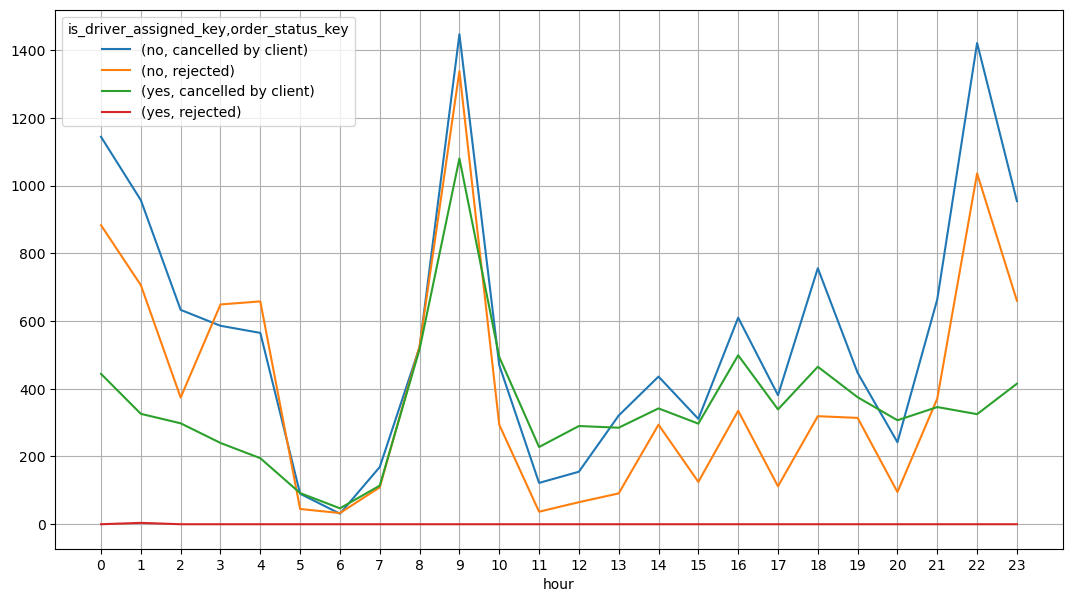

In [19]:
df_pivot.plot(kind='line',figsize=(13,7), xticks=range(0,24),grid='true')

# Question 3
Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

In [20]:
df_q3 = df.copy()
df_q3

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,hour
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,cancelled by client,yes,198.0,300050983403,19
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986179,21
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986174,21
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986180,21
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,cancelled by client,yes,46.0,300050976275,13
...,...,...,...,...,...,...,...,...,...,...
31263,1900-01-01 12:44:11,-0.975372,51.457846,NaN,3000597886155,cancelled by client,no,43.0,300051590196,13
31264,1900-01-01 12:42:52,-0.975372,51.457846,NaN,3000597886140,cancelled by client,no,44.0,300051590176,13
31265,1900-01-01 13:11:35,-0.975372,51.457846,NaN,3000599186906,cancelled by client,no,36.0,300051648809,14
31266,1900-01-01 13:17:21,-0.972926,51.457693,60.0,3000599187034,cancelled by client,yes,34.0,300051648910,14


In [21]:
df_q3.groupby(['hour','is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().reset_index(name='average')

,hour,is_driver_assigned_key,average
0,0,no,117.294580
1,0,yes,320.189189
2,1,no,115.126437
3,1,yes,276.082822
4,2,no,100.593997
5,2,yes,296.312081
6,3,no,121.305461
7,3,yes,301.466667
8,4,no,129.182301
9,4,yes,368.682051


In [22]:
df_q3_pivot = pd.pivot_table(
    df_q3,
    values='cancellations_time_in_seconds',    # Valeur à résumer
    index='hour',
    columns='is_driver_assigned_key',    # Colonnes      
    aggfunc='mean', # Fonction d'agrégation
    fill_value=0
)
df_q3_pivot

is_driver_assigned_key,no,yes
hour,,
0,117.294580,320.189189
1,115.126437,276.082822
2,100.593997,296.312081
3,121.305461,301.466667
4,129.182301,368.682051
5,100.733333,245.250000
6,102.838710,156.617021
7,202.952663,225.508772
8,141.177820,177.640232


<Axes: title={'center': 'average time to cancellation with and without driver, by the hour'}, xlabel='hour', ylabel='time in seconds'>

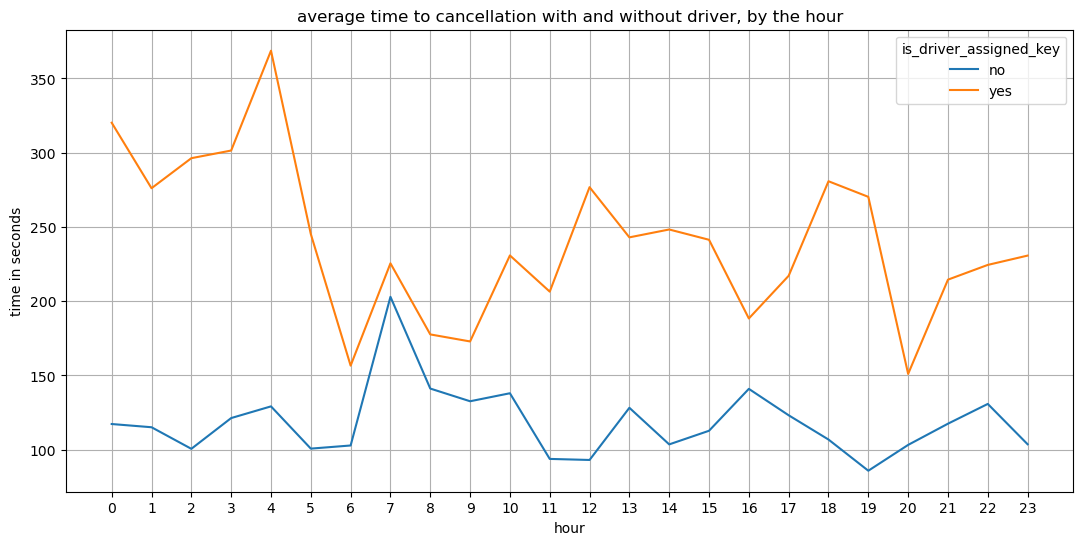

In [23]:
df_q3_pivot.plot(
    kind='line', 
    figsize=(13,6), 
    xticks=range(0,24),
    grid='true', 
    title='average time to cancellation with and without driver, by the hour',
    xlabel='hour',
    ylabel='time in seconds'
)

# Question 4
Plot the distribution of average ETA by hours. How can this plot be explained?

In [24]:
df_q4 = df.copy()
df_q4

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,hour
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,cancelled by client,yes,198.0,300050983403,19
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986179,21
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986174,21
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986180,21
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,cancelled by client,yes,46.0,300050976275,13
...,...,...,...,...,...,...,...,...,...,...
31263,1900-01-01 12:44:11,-0.975372,51.457846,NaN,3000597886155,cancelled by client,no,43.0,300051590196,13
31264,1900-01-01 12:42:52,-0.975372,51.457846,NaN,3000597886140,cancelled by client,no,44.0,300051590176,13
31265,1900-01-01 13:11:35,-0.975372,51.457846,NaN,3000599186906,cancelled by client,no,36.0,300051648809,14
31266,1900-01-01 13:17:21,-0.972926,51.457693,60.0,3000599187034,cancelled by client,yes,34.0,300051648910,14


In [25]:
df_q4.groupby('hour')['m_order_eta'].mean().reset_index(name='average_ETA')

,hour,average_ETA
0,0,386.078829
1,1,375.433333
2,2,355.322148
3,3,389.554167
4,4,381.492308
5,5,266.119565
6,6,476.787234
7,7,489.456140
8,8,642.746615
9,9,671.086111


In [26]:
df_q4_pivot = pd.pivot_table(
    df_q4,
    values='m_order_eta',    # Valeur à résumer
    index='hour',     
    aggfunc='mean', # Fonction d'agrégation
    fill_value=0
)
df_q4_pivot

,m_order_eta
hour,
0,386.078829
1,375.433333
2,355.322148
3,389.554167
4,381.492308
5,266.119565
6,476.787234
7,489.456140
8,642.746615


<Axes: title={'center': 'average ETA by hours'}, xlabel='hour', ylabel='time in seconds'>

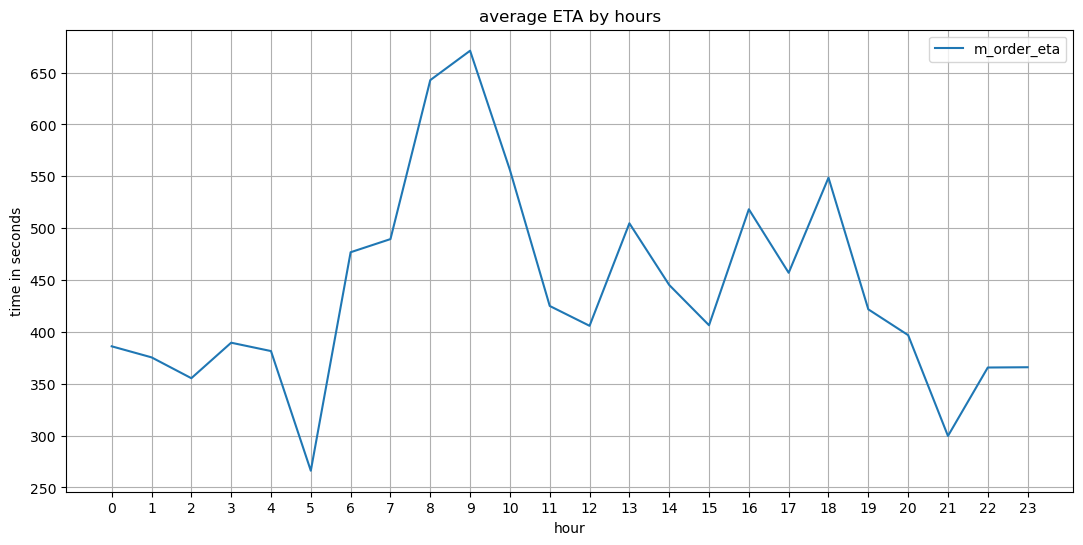

In [27]:
df_q4_pivot.plot(
    kind='line', 
    figsize=(13,6), 
    xticks=range(0,24),
    grid='true', 
    title='average ETA by hours',
    xlabel='hour',
    ylabel='time in seconds'
)

# Question 5
BONUS Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

In [ ]:
pip install h3

In [ ]:
pip install folium

In [34]:
import h3
import folium

In [86]:
df_q5 = df.copy()
df_q5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31268 entries, 0 to 31267
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_datetime                 31268 non-null  datetime64[ns]
 1   origin_longitude               31268 non-null  float64       
 2   origin_latitude                31268 non-null  float64       
 3   m_order_eta                    8364 non-null   float64       
 4   order_gk                       31268 non-null  int64         
 5   order_status_key               31268 non-null  object        
 6   is_driver_assigned_key         31268 non-null  object        
 7   cancellations_time_in_seconds  21795 non-null  float64       
 8   offer_id                       31268 non-null  int64         
 9   hour                           31268 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(2)
memory usage: 2.3+

In [87]:
# Step 1: Generate H3 hexes at resolution 8
df_q5['hex'] = df_q5.apply(lambda row: h3.latlng_to_cell(row['origin_latitude'], row['origin_longitude'], 8), axis=1)
df_q5

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id,hour,hex
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,cancelled by client,yes,198.0,300050983403,19,88195d2b03fffff
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986179,21,88195d2b19fffff
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986174,21,88195d2b19fffff
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,cancelled by client,no,128.0,300050986180,21,88195d2b19fffff
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,cancelled by client,yes,46.0,300050976275,13,88195d2b1dfffff
...,...,...,...,...,...,...,...,...,...,...,...
31263,1900-01-01 12:44:11,-0.975372,51.457846,NaN,3000597886155,cancelled by client,no,43.0,300051590196,13,88195d2b03fffff
31264,1900-01-01 12:42:52,-0.975372,51.457846,NaN,3000597886140,cancelled by client,no,44.0,300051590176,13,88195d2b03fffff
31265,1900-01-01 13:11:35,-0.975372,51.457846,NaN,3000599186906,cancelled by client,no,36.0,300051648809,14,88195d2b03fffff
31266,1900-01-01 13:17:21,-0.972926,51.457693,60.0,3000599187034,cancelled by client,yes,34.0,300051648910,14,88195d2b1dfffff


In [88]:
# Step 2: Aggregate data by hex
grouped_q5 = df_q5.groupby("hex")["order_gk"].count()
grouped_q5.shape

(139,)

In [89]:
grouped_q5 = grouped_q5.reset_index()
grouped_q5.sample(n=5, random_state=42)

,hex,order_gk
135,88195d74d1fffff,1
66,88195d2a33fffff,12
31,88195d2941fffff,52
118,88195d2b5dfffff,31
42,88195d2961fffff,5


In [90]:
grouped_q5 = grouped_q5.sort_values(by="order_gk")  # 1
total_orders = grouped_q5["order_gk"].sum()  # 2
grouped_q5["cum_sum"] = grouped_q5["order_gk"].cumsum()  # 3
grouped_q5["cum_perc"] = 100 * grouped_q5["cum_sum"] / total_orders  # 4
grouped_q5[grouped_q5["cum_perc"] <= 80]  # 5

,hex,order_gk,cum_sum,cum_perc
137,88195d74d5fffff,1,1,0.003198
135,88195d74d1fffff,1,2,0.006396
79,88195d2aebfffff,1,3,0.009594
11,88195d282bfffff,1,4,0.012793
122,88195d3993fffff,1,5,0.015991
...,...,...,...,...
61,88195d2a27fffff,1295,15628,49.980811
20,88195d284dfffff,1937,17565,56.175643
91,88195d2b19fffff,1960,19525,62.444032
87,88195d2b11fffff,2191,21716,69.451196


In [91]:
map = folium.Map(location=[df["origin_latitude"].mean(), df["origin_longitude"].mean()],
                 zoom_start=8.5,  # after a bit of experimentation, we thought this presents the map best
                 tiles="cartodbpositron")

In [37]:
pip install geojson

Note: you may need to restart the kernel to use updated packages.


In [103]:
import json
import geojson


def to_geojson(row):
    """Transform hex_id into a geojson object."""
    geometry = {
        "type": "Polygon",
        "coordinates": [[
            [lon, lat] for lat, lon in h3.cell_to_boundary(h=row["hex"])
        ]]
    }
    return geojson.Feature(id=row["hex"], geometry=geometry, properties={"order_gk": row["order_gk"]})


geojsons = grouped_q5.apply(func=to_geojson, axis=1).values.tolist()
geojson_str: str = json.dumps(geojson.FeatureCollection(geojsons))

In [104]:
import matplotlib

# instantiate a colormap object for better visualisation
#colormap = matplotlib.cm.get_cmap(name="plasma")
colormap = matplotlib.colormaps["plasma"]
max_order_gk = grouped_q5["order_gk"].max()
min_order_gk = grouped_q5["order_gk"].min()

In [105]:
_ = folium.GeoJson(data=geojson_str, style_function=lambda f: {
    "fillColor": matplotlib.colors.to_hex(
        colormap((f["properties"]["order_gk"] - min_order_gk)
                / (max_order_gk - min_order_gk)
                if max_order_gk > min_order_gk else 0
            )
    ),
    "color": "black",
    "weight": 1,
    "fillOpacity": 0.7
}).add_to(map)

In [106]:
try:
    geojson_data = json.loads(geojson_str)
    print("GeoJSON est valide.")
except json.JSONDecodeError as e:
    print("Erreur de JSON :", e)

GeoJSON est valide.


In [107]:
# Ajuster les limites de la carte
map.fit_bounds(folium.GeoJson(data=geojson_data).get_bounds())

In [1]:
map

map

# TEST POUR RESOUDRE H3


In [24]:
h3_index = h3.latlng_to_cell(37.7749, -122.4194, 9)
print(h3_index)

89283082803ffff


In [20]:
help(h3.latlng_to_cell)

Help on function latlng_to_cell in module h3.api.basic_str:

latlng_to_cell(lat, lng, res)
    Return the cell containing the (lat, lng) point
    for a given resolution.
    
    Returns
    -------
    H3Cell



In [39]:
dir(h3)

['H3BaseException',
 'H3CellInvalidError',
 'H3DirEdgeInvalidError',
 'H3DomainError',
 'H3DuplicateInputError',
 'H3FailedError',
 'H3GridNavigationError',
 'H3LatLngDomainError',
 'H3MemoryAllocError',
 'H3MemoryBoundsError',
 'H3MemoryError',
 'H3NotNeighborsError',
 'H3OptionInvalidError',
 'H3PentagonError',
 'H3ResDomainError',
 'H3ResMismatchError',
 'H3Shape',
 'H3UndirEdgeInvalidError',
 'H3ValueError',
 'H3VertexInvalidError',
 'LatLngMultiPoly',
 'LatLngPoly',
 'UnknownH3ErrorCode',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_cy',
 '_h3shape',
 '_version',
 'api',
 'are_neighbor_cells',
 'average_hexagon_area',
 'average_hexagon_edge_length',
 'cell_area',
 'cell_to_boundary',
 'cell_to_center_child',
 'cell_to_child_pos',
 'cell_to_children',
 'cell_to_children_size',
 'cell_to_latlng',
 'cell_to_local_ij',
 'cell_to_parent',
 'cell_to_vertex',
 'cell_to_vertexes',
 'cells_

In [41]:
help(h3.cells_to_h3shape)

Help on function cells_to_h3shape in module h3.api.basic_str:

cells_to_h3shape(cells, *, tight=True)
    Return an ``H3Shape`` describing the area covered by a collection of H3 cells.
    Will return ``LatLngPoly`` or ``LatLngMultiPoly``.
    
    Parameters
    ----------
    cells : iterable of H3 cells
    tight : bool
        If True, return ``LatLngPoly`` if possible.
        If False, always return ``LatLngMultiPoly``.
    
    Returns
    -------
    LatLngPoly | LatLngMultiPoly
    
    Examples
    --------
    
    >>> cells = ['8428309ffffffff', '842830dffffffff']
    >>> h3.cells_to_h3shape(cells, tight=True)
    <LatLngPoly: [10]>
    >>> h3.cells_to_h3shape(cells, tight=False)
    <LatLngMultiPoly: [10]>



In [51]:
help(h3.cell_to_boundary)

Help on function cell_to_boundary in module h3.api.basic_str:

cell_to_boundary(h)
    Return tuple of lat/lng pairs describing the cell boundary.
    
    Parameters
    ----------
    h : H3Cell
    
    Returns
    -------
    tuple of (lat, lng) tuples

